In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
import numpy as np

import random

def draw_token_series_rss(n: int, bins: int=100):
    
    """
    Given a total count N and a bin size, randomly draw a series
    and calculate the RSS against the uniform.
    """
    
    expected = np.full(bins, n/bins)
    
    observed = np.zeros(bins)
    
    for _ in range(n):
        observed[random.randint(0, bins-1)] += 1
        
    return np.sum((expected-observed)**2)

In [25]:
def draw_rss_std(n: int, samples: int=10000, bins: int=100):
    
    return np.std([
        draw_token_series_rss(n, bins)
        for _ in range(samples)
    ])

In [ ]:
data = [
    (n, bins, draw_rss_std(n, bins=bins))
    for n in range(0, 1000, 100)
    for bins in range(100, 1000, 100)
]

In [28]:
import pandas as pd

df = pd.DataFrame(data, columns=('n', 'bins', 'std'))

In [29]:
from patsy import dmatrices

y, x = dmatrices(
    'std ~ n + bins',
    data=df,
    return_type='dataframe',
)

In [30]:
import statsmodels.api as sm

mod = sm.OLS(y, x)

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    std   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     256.9
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           3.10e-37
Time:                        23:45:15   Log-Likelihood:                -333.94
No. Observations:                  90   AIC:                             673.9
Df Residuals:                      87   BIC:                             681.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     22.1591      2.846      7.786      0.000        16.502    27.816
n              0.0736      0.004     19.939      0.000         0.066     0.081
bins          -0.0443      0.004    -10.785      0.000        -0.052    -0.036
==============================================================================
Omnibus:                       43.878   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.752
Skew:                           1.766   Prob(JB):                     8.92e-25
Kurtosis:                       7.130   Cond. No.                     1.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

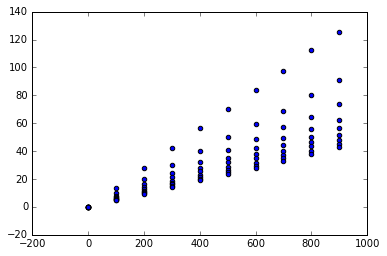

In [37]:
plt.scatter(df['n'], df['std'])